# **Introduction to Machine Learning Chapter 5.1**
# **Multiclass classification using neural network**
---

## inport libraries

In [1]:
import numpy as np                  # for scientific computing (e.g. culclations with array)
import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for visualization

np.set_printoptions(suppress=True)  # If True, always print floating point numbers using fixed point notation. If False, then scientific notation is used.
np.set_printoptions(precision=3, floatmode='fixed')

---
# **Softmax function**
---

## **Example 5.1.1** Example of softmax function

In [2]:
x = np.array([2.6, 4.3, -1.7])

y = np.exp(x) / np.sum( np.exp(x) )
sum_y = np.sum(y)

print("y = ", y)
print("sum(y) = ", sum_y)

y =  [0.154 0.844 0.002]
sum(y) =  0.9999999999999999


## **Example 5.1.2** Implementation of Softmax function

In [3]:
# matrix compatible version
def softmax(x):
    max_x = np.max(x, axis=-1, keepdims=True)
    exp_x = np.exp(x - max_x)                           # overflow protection
    y = exp_x / np.sum(exp_x, axis=-1, keepdims=True)
    return y

Example of using softmax function

y = [-0.300  1.600  3.000  0.000 -4.300  0.600]
softmax_y = [0.026 0.173 0.702 0.035 0.000 0.064]
sum(softmax_y)= 1.0000000000000002


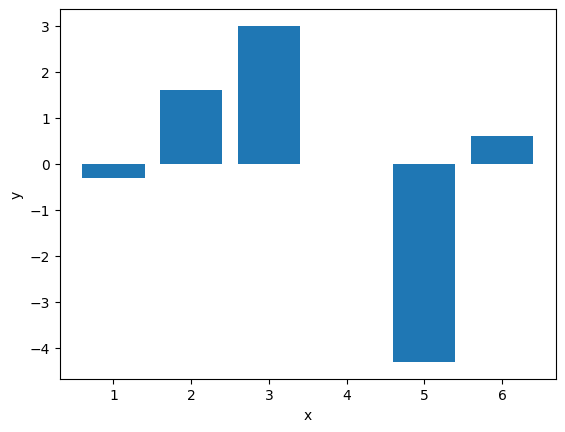

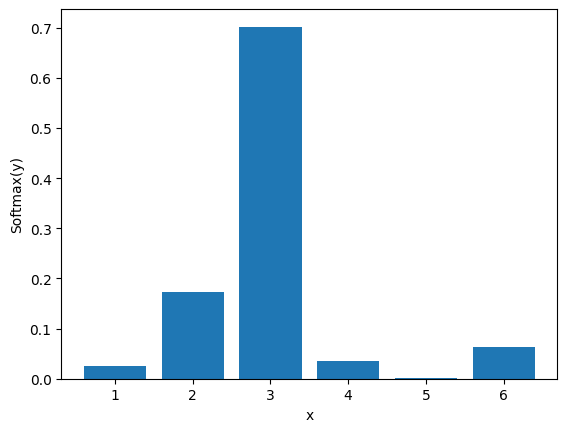

In [4]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([-0.3, 1.6, 3.0, 0.0, -4.3, 0.6])
softmax_y = softmax(y)
print("y =", y)
print("softmax_y =", softmax_y)
print('sum(softmax_y)=', np.sum(softmax_y))

# draw the input graph
plt.bar(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# draw the input graph
plt.bar(x, softmax_y)
plt.xlabel("x")
plt.ylabel("Softmax(y)")
plt.show()

## **[Appendix]** Overflow protection for Softmax function

In [5]:
x = np.array([10, 2000, -3])
y = np.exp(x) / np.sum( np.exp(x) )
# y = softmax(x)                      # with overflow protection

<ipython-input-5-b96864c58dc3>:2: RuntimeWarning: overflow encountered in exp
  y = np.exp(x) / np.sum( np.exp(x) )
<ipython-input-5-b96864c58dc3>:2: RuntimeWarning: invalid value encountered in divide
  y = np.exp(x) / np.sum( np.exp(x) )


## **[Appendix]** Softmax function for matrices

In [6]:
import numpy as np

y = np.array([[3, 2, -1],
             [-2, 5, 3],
             [1, 0, -3]])

softmax_y = softmax(y)

print("y=\n", y)
print("softmax_y=\n", softmax_y)

y=
 [[ 3  2 -1]
 [-2  5  3]
 [ 1  0 -3]]
softmax_y=
 [[0.721 0.265 0.013]
 [0.001 0.880 0.119]
 [0.721 0.265 0.013]]


---
# **Softmax with Cross-entropy**
---

## **Example 5.1.3** Implementation of Softmax with Cross-entropy class

In [7]:
class SoftmaxWithCrossEntropy:
    def __init__(self):
        self.loss = None
        self.y = None # output of softmax
        self.t = None # labels

    def forward(self, x, t):
        self.t = t
        self.y = self.softmax(x)
        self.loss = self.cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        input_size = self.t.shape[0]
        dx = (self.y - self.t) / input_size
        return dx

    def softmax(self, x):
        max_x = np.max(x, axis=-1, keepdims=True)
        exp_x = np.exp(x - max_x)  # overflow protection
        y = exp_x / np.sum(exp_x, axis=-1, keepdims=True)
        return y

    def cross_entropy_error(self, y, t):
        delta = 1e-7
        return -np.sum(t * np.log(y + delta))

---
# **Classification for Iris dataset**
---

## **Example 5.1.4** Preparation of the Iris dataset

In [8]:
#import libraries
from sklearn.datasets import load_iris

iris = load_iris() #load dataset

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
# input data and its labels
x = iris.data
t = iris.target

print("X=\n", x)
print("t=\n", t)

X=
 [[5.100 3.500 1.400 0.200]
 [4.900 3.000 1.400 0.200]
 [4.700 3.200 1.300 0.200]
 [4.600 3.100 1.500 0.200]
 [5.000 3.600 1.400 0.200]
 [5.400 3.900 1.700 0.400]
 [4.600 3.400 1.400 0.300]
 [5.000 3.400 1.500 0.200]
 [4.400 2.900 1.400 0.200]
 [4.900 3.100 1.500 0.100]
 [5.400 3.700 1.500 0.200]
 [4.800 3.400 1.600 0.200]
 [4.800 3.000 1.400 0.100]
 [4.300 3.000 1.100 0.100]
 [5.800 4.000 1.200 0.200]
 [5.700 4.400 1.500 0.400]
 [5.400 3.900 1.300 0.400]
 [5.100 3.500 1.400 0.300]
 [5.700 3.800 1.700 0.300]
 [5.100 3.800 1.500 0.300]
 [5.400 3.400 1.700 0.200]
 [5.100 3.700 1.500 0.400]
 [4.600 3.600 1.000 0.200]
 [5.100 3.300 1.700 0.500]
 [4.800 3.400 1.900 0.200]
 [5.000 3.000 1.600 0.200]
 [5.000 3.400 1.600 0.400]
 [5.200 3.500 1.500 0.200]
 [5.200 3.400 1.400 0.200]
 [4.700 3.200 1.600 0.200]
 [4.800 3.100 1.600 0.200]
 [5.400 3.400 1.500 0.400]
 [5.200 4.100 1.500 0.100]
 [5.500 4.200 1.400 0.200]
 [4.900 3.100 1.500 0.200]
 [5.000 3.200 1.200 0.200]
 [5.500 3.500 1.300 0.20

In [13]:
from sklearn.model_selection import train_test_split

# Divide into training data and test data and shuffle
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.4, random_state=47)

print("x_train.shape=", x_train.shape)
print("t_train.shape=", t_train.shape)
print("x_test.shape=", x_test.shape)
print("t_test.shape=", t_test.shape)

x_train.shape= (90, 4)
t_train.shape= (90,)
x_test.shape= (60, 4)
t_test.shape= (60,)


### Class Definition

In [14]:
class Linear:
    def __init__(self, w, b):
        self.w = w # weights
        self.b = b # biases
        self.x = None
        self.dw = None # gradient of w
        self.db = None # gradient of b

    def forward(self, x):
        self.x = x
        p = np.dot(x, self.w) + self.b    # Affine mapping
        return p

    def backward(self, dL0):
        dL = np.dot(dL0, self.w.T)        # dL/dx
        self.dw = np.dot(self.x.T, dL0)   # dL/dw
        self.db = np.sum(dL0, axis=0)     # dL/db
        return dL

    def get_params(self):
        return [self.w, self.b]

    def get_grads(self):
        return [self.dw, self.db]

class Sigmoid:
    def __init__(self):
        self.y = None

    def forward(self, x):
        y = 1 / (1 + np.exp(-x))  # Sigmoid function
        self.y = y
        return y

    def backward(self, dL0):
        dL = dL0 * self.y * (1.0 - self.y)  #dL/dp
        return dL

    def get_params(self):
        return []

    def get_grads(self):
        return []

class Relu:
  def __init__(self):
    self.mask = None

  def forward(self, x):
    out = x.copy()
    self.mask = (x <= 0)    # Save information of elements that were less than or equal to 0 as "mask".
    out[self.mask] = 0      #replace elements that were less than or equal to 0 with 0.
    return out

  def backward(self, dout):
    dout[self.mask] = 0 #Replace elements that were less than or equal to 0 during forward propagation with 0.
    dx = dout
    return dx

class MSE:
    def __init__(self):
        self.z = None
        self.t = None

    def forward(self, z, t):
        self.z = z
        self.t = t
        row, col = z.shape # row:data_num, col:input dimension
        loss = np.sum((z-t) ** 2) / row
        return loss

    def backward(self):
        dL = self.z - self.t    #dL/dz
        return dL

class SoftmaxWithCrossEntropy:
    def __init__(self):
        self.loss = None
        self.y = None # output of softmax
        self.t = None # labels

    def forward(self, x, t):
        self.t = t
        self.y = self.softmax(x)
        self.loss = self.cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        input_size = self.t.shape[0]
        dx = (self.y - self.t) / input_size
        return dx

    def softmax(self, x):
        max_x = np.max(x, axis=-1, keepdims=True)
        exp_x = np.exp(x - max_x)  # overflow protection
        y = exp_x / np.sum(exp_x, axis=-1, keepdims=True)
        return y

    def cross_entropy_error(self, y, t):
        delta = 1e-7
        return -np.sum(t * np.log(y + delta))

# optimizer
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update(self, layers):
        for layer in layers.values():
            for (param, grad) in zip(layer.get_params(), layer.get_grads()):
                param -= self.learning_rate * grad # Gradient descent

## **Example 5.1.5** Neural network model

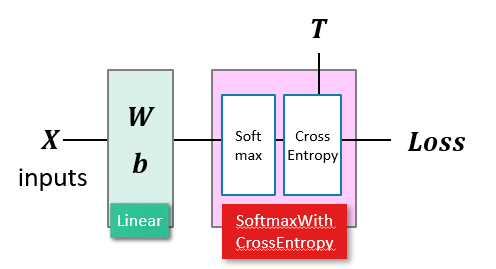

In [15]:
from collections import OrderedDict

class Model3:
    def __init__(self, input_size, output_size):
        #initialize weights and biases
        W1 = np.random.randn(input_size, output_size)  #initialize weights with random value
        b1 = np.zeros(output_size)  #initialize biases with 0

        #neural network model definition
        self.layers = OrderedDict()
        self.layers['linear1'] = Linear(W1, b1)     # Linear layer
        self.loss_layer = SoftmaxWithCrossEntropy() # Softmax with CrossEntropy layer

    def get_layers(self):
        return self.layers

    # forward calculation
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.loss_layer.forward(y, t)  # get Loss and return

    # backward calculation
    def backward(self):
        dL = self.loss_layer.backward() # Loss layer
        for layer in reversed(self.layers.values()):
            dL = layer.backward(dL)

In [16]:
# Calculate accuracy using predictions and targets
def accuracy(y_pred, t):
  acc = np.sum(y_pred == t) / np.float32(t.shape[0])
  return acc

## **Example 5.1.6** One-hot encoding

In [17]:
# one-hot encoding for training data
t_train_onehot = np.identity(3)[t_train]

#one-hot encoding for test data
t_test_onehot = np.identity(3)[t_test]

print("t_train=\n", t_train)
print("t_train_onehot=\n", t_train_onehot)

t_train=
 [0 0 1 1 0 0 2 2 1 0 2 2 2 2 0 1 0 1 0 1 2 2 1 2 2 1 2 2 2 0 2 0 1 0 2 1 1
 1 0 2 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 2 1 0 0 1 1 2 1 1 0 1 1 0 1 2 2 2
 1 1 2 1 1 2 2 0 1 0 1 1 0 1 2 2]
t_train_onehot=
 [[1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.00

## **Example 5.1.7** Learning with Iris dataset

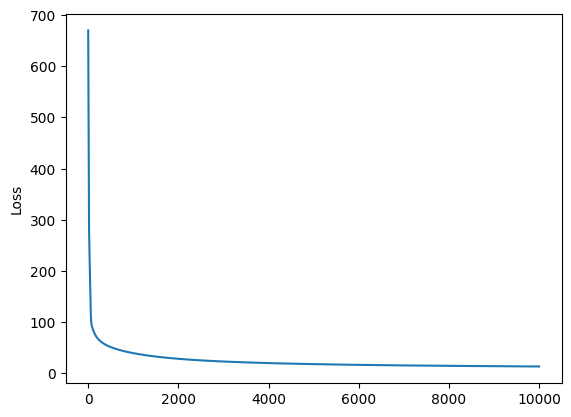

accuracy=
 1.0 



In [20]:
import matplotlib.pyplot as plt

# change labels to one-hot vector
t_train_onehot = np.identity(3)[t_train] # one-hot encoding for training data
t_test_onehot = np.identity(3)[t_test] #one-hot encoding for test data

#model
input_size = x_train.shape[1]           # input_size = 2
output_size = t_train_onehot.shape[1]   # output_size = 3 (3 classes)
net = Model3(input_size, output_size)   # neural network model
optimizer = SGD(learning_rate = 0.01)   # for update parameters

Epoch = 10000 # the number of training
loss = []

#learning process
for i in range(Epoch):
    l = net.loss(x_train, t_train_onehot)   # forward calculation
    net.backward()                          # backward propagation
    optimizer.update(net.get_layers())      # update parameters
    loss.append(l)                          # record current loss

# draw the loss graph
plt.plot(loss)
plt.ylabel("Loss")
plt.show()

# evaluation
y_test = net.predict(x_test)
y_test_pred = np.argmax(y_test, axis=1)       # pred is the label of the output given the highest probability by the network
acc = accuracy(y_test_pred, t_test)
print("accuracy=\n", acc, "\n")

## **Example 5.1.8** Dispaly the confusion matrix

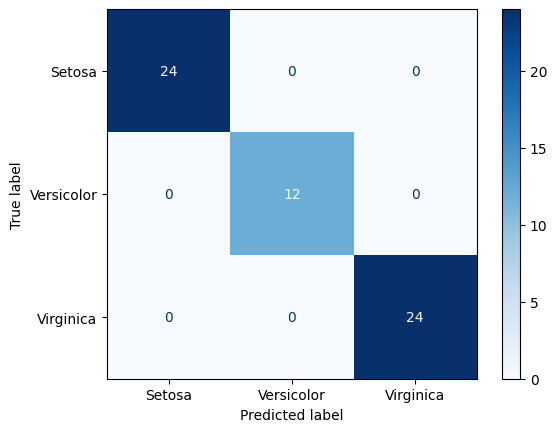

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = np.argmax(y_test, axis=1)     # pred is the label of the output given the highest probability by the network
t = np.argmax(t_test_onehot, axis=1)        # t is the correct label
class_names = ["Setosa", "Versicolor", "Virginica"]

cm = confusion_matrix(y_pred=y_test_pred, y_true=t)
cmp = ConfusionMatrixDisplay(cm, display_labels=class_names)

cmp.plot(cmap=plt.cm.Blues)

## 🤔 **Exercise 5.1**

In [43]:
from collections import OrderedDict

class Model3_5_1:
    def __init__(self, input_size, hidden_size, output_size):
        #initialize weights and biases
        W1 = np.random.randn(input_size, hidden_size)
        b1 = np.zeros(hidden_size)
        U1 = np.random.randn(hidden_size, output_size)
        c1 = np.zeros(output_size)

        #neural network model definition
        self.layers = OrderedDict()
        self.layers['linear1'] = Linear(W1, b1)  # Linear layer
        self.layers['sigmoid'] = Sigmoid()
        self.layers['linear2'] = Linear(U1, c1) # Linear layer
        self.loss_layer = SoftmaxWithCrossEntropy() # Softmax with CrossEntropy layer

    def get_layers(self):
        return self.layers

    # forward calculation
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.loss_layer.forward(y, t)  # get Loss and return

    # backward calculation
    def backward(self):
        dL = self.loss_layer.backward() # Loss layer
        for layer in reversed(self.layers.values()):
            dL = layer.backward(dL)

In [44]:
# Calculate accuracy using predictions and targets
def accuracy(y_pred, t):
  acc = np.sum(y_pred == t) / np.float32(t.shape[0])
  return acc

In [45]:
# one-hot encoding for training data
t_train_onehot = np.identity(3)[t_train]

#one-hot encoding for test data
t_test_onehot = np.identity(3)[t_test]

print("t_train=\n", t_train)
print("t_train_onehot=\n", t_train_onehot)

t_train=
 [0 0 1 1 0 0 2 2 1 0 2 2 2 2 0 1 0 1 0 1 2 2 1 2 2 1 2 2 2 0 2 0 1 0 2 1 1
 1 0 2 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 2 1 0 0 1 1 2 1 1 0 1 1 0 1 2 2 2
 1 1 2 1 1 2 2 0 1 0 1 1 0 1 2 2]
t_train_onehot=
 [[1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.00

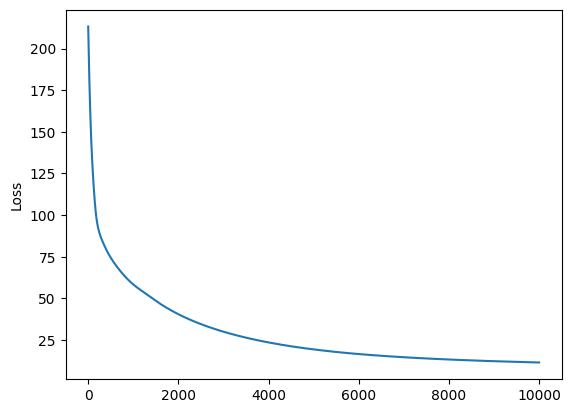

accuracy=
 1.0 



In [46]:
import matplotlib.pyplot as plt

# change labels to one-hot vector
t_train_onehot = np.identity(3)[t_train] # one-hot encoding for training data
t_test_onehot = np.identity(3)[t_test] #one-hot encoding for test data

#model
input_size = x_train.shape[1]           # input_size = 2
hidden_size = 10
output_size = t_train_onehot.shape[1]   # output_size = 3 (3 classes)
net = Model3_5_1(input_size, hidden_size, output_size)   # neural network model
optimizer = SGD(learning_rate = 0.01)   # for update parameters

Epoch = 10000 # the number of training
loss = []

#learning process
for i in range(Epoch):
    l = net.loss(x_train, t_train_onehot)   # forward calculation
    net.backward()                          # backward propagation
    optimizer.update(net.get_layers())      # update parameters
    loss.append(l)                          # record current loss

# draw the loss graph
plt.plot(loss)
plt.ylabel("Loss")
plt.show()

# evaluation
y_test = net.predict(x_test)
y_test_pred = np.argmax(y_test, axis=1)       # pred is the label of the output given the highest probability by the network
acc = accuracy(y_test_pred, t_test)
print("accuracy=\n", acc, "\n")

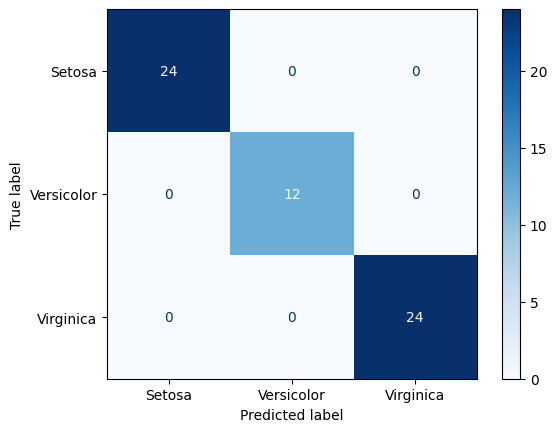

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = np.argmax(y_test, axis=1)     # pred is the label of the output given the highest probability by the network
t = np.argmax(t_test_onehot, axis=1)        # t is the correct label
class_names = ["Setosa", "Versicolor", "Virginica"]

cm = confusion_matrix(y_pred=y_test_pred, y_true=t)
cmp = ConfusionMatrixDisplay(cm, display_labels=class_names)

cmp.plot(cmap=plt.cm.Blues)

---
# **For a deeper understanding of the Sigmoid and Softmax functions**
---

## Probability and Odds

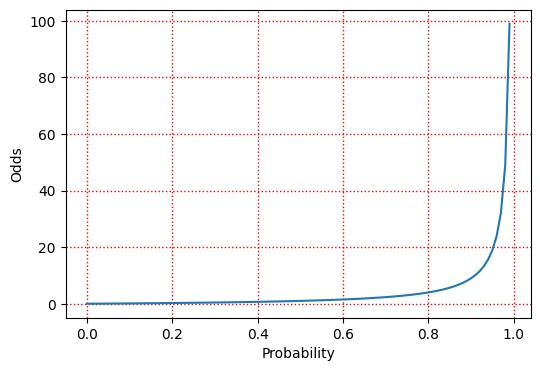

In [48]:
import numpy as np
import matplotlib.pyplot as plt

p = np.arange(0, 1, 0.01)
odds = p / (1-p)

plt.figure(figsize=(6, 4))
plt.plot(p, odds)
plt.xlabel("Probability")
plt.ylabel("Odds")
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.show()

## Logit (log-odds)

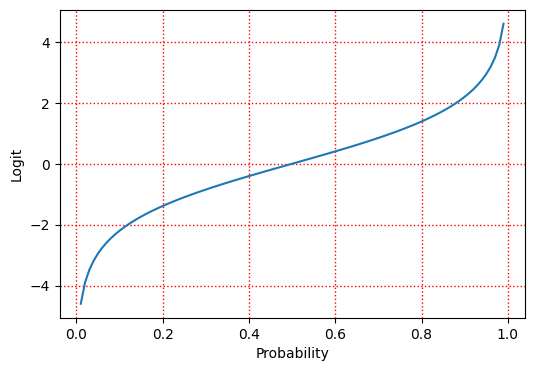

In [49]:
import numpy as np
import matplotlib.pyplot as plt

p = np.arange(0.01, 1, 0.01)
logit = np.log(p / (1.0-p))

plt.figure(figsize=(6, 4))
plt.plot(p, logit)
plt.xlabel("Probability")
plt.ylabel("Logit")
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.show()

## Sigmoid function (Standard Logistic function)

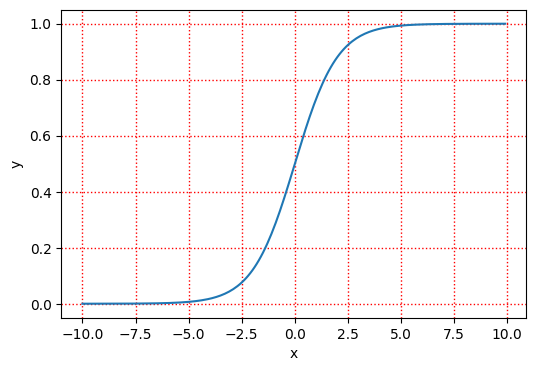

In [50]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.show()